In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drug-performance-evaluation/Drug.csv
/kaggle/input/drug-performance-evaluation/Drug_clean.csv


In [2]:
import matplotlib.pyplot as pyplt
import seaborn as sns

In [3]:
data = pd.read_csv('/kaggle/input/drug-performance-evaluation/Drug.csv')
type(data)

pandas.core.frame.DataFrame

In [4]:
data

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
1,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
2,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755 Reviews,2.78,3.00,2.08,\r\n\t\t\t\t\t This is a generic drug. The ave...
3,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...
4,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...
...,...,...,...,...,...,...,...,...,...
2214,vulvovaginal candidiasis,Clotrimazole,On Label,OTC,2 Reviews,5.00,5.00,5.00,\r\n\t\t\t\t\tClotrimazole is used to treat sk...
2215,vulvovaginal candidiasis,Butoconazole Nitrate,On Label,RX,1 Reviews,5.00,5.00,5.00,\r\n\t\t\t\t\tThis medication is used to treat...
2216,vulvovaginal candidiasis,Clotrimazole,On Label,OTC,1 Reviews,5.00,4.00,5.00,\r\n\t\t\t\t\tClotrimazole is used to treat sk...
2217,vulvovaginal candidiasis,Butoconazole Nitrate,On Label,OTC,1 Reviews,5.00,5.00,5.00,\r\n\t\t\t\t\tThis medication is used to treat...


In [5]:
data.shape

(2219, 9)

In [6]:
data.isnull().sum()

Condition       0
Drug            0
Indication      0
Type            0
Reviews         0
Effective       0
EaseOfUse       0
Satisfaction    0
Information     0
dtype: int64

> No Null values

In [7]:
data.head()

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
1,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
2,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755 Reviews,2.78,3.00,2.08,\r\n\t\t\t\t\t This is a generic drug. The ave...
3,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...
4,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...


In [8]:
#checking for duplicates
duplicate = data[data.duplicated()]
duplicate

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information
1,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
4,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...
5,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...
6,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...
7,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...
...,...,...,...,...,...,...,...,...,...
2187,vertigo,Diphenhydramine Hcl,On Label,OTC,1 Reviews,5.00,5.00,5.00,\r\n\t\t\t\t\t This is a generic drug. You can...
2188,vertigo,Diphenhydramine Hcl,On Label,OTC,1 Reviews,4.00,5.00,3.00,\r\n\t\t\t\t\t This is a generic drug. You can...
2189,vertigo,Diphenhydramine Hcl,On Label,OTC,1 Reviews,3.00,4.00,4.00,\r\n\t\t\t\t\t This is a generic drug. You can...
2193,vulvovaginal candidiasis,Fluconazole,On Label,RX,225 Reviews,3.32,4.41,2.97,\r\n\t\t\t\t\tFluconazole is used to treat vag...


In [9]:
#dropping duplicates
data.drop_duplicates(subset="Drug",
                     keep=False, inplace=True)
data

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information
40,Acute Bacterial Sinusitis,Moxifloxacin-Sod.Chloride(Iso),On Label,RX,5 Reviews,2.33,2.33,2.00,\r\n\t\t\t\t\tThis medication is used to treat...
73,adenocarcinoma of pancreas,Mitomycin,On Label,RX,4 Reviews,2.50,2.00,2.00,\r\n\t\t\t\t\tMitomycin is used to treat vario...
97,Atopic Dermatitis,Pimecrolimus,On Label,RX,79 Reviews,3.26,4.14,3.17,\r\n\t\t\t\t\t This is a brand name drug and a...
117,Atopic Dermatitis,Hydrocortisone Butyr-Emollient,On Label,RX,31 Reviews,4.57,4.86,4.43,\r\n\t\t\t\t\tThis medication is used to treat...
126,Atopic Dermatitis,Vit E-Grape-Hyaluronate Sodium,On Label,RX,22 Reviews,3.69,4.54,3.77,\r\n\t\t\t\t\t This is a brand name drug and a...
...,...,...,...,...,...,...,...,...,...
2003,Pharyngitis due to Streptococcus Pyogenes,"Penicillin G Benzathin,Procain",On Label,RX,5 Reviews,2.67,2.67,2.33,\r\n\t\t\t\t\t This is a brand name drug and a...
2078,scabies,Crotamiton,On Label,RX,10 Reviews,4.00,4.33,3.50,\r\n\t\t\t\t\tThis medication is used to treat...
2105,sore throat,DM-Benzocaine-Menthol,On Label,OTC,1 Reviews,1.00,1.00,1.00,\r\n\t\t\t\t\t This is a brand name drug and a...
2117,vertigo,Diphenhydramine Citrate,On Label,OTC,17 Reviews,4.30,4.60,4.10,\r\n\t\t\t\t\t This is a generic drug. You can...


In [10]:
data['NoOfReviews']=data.Reviews.str.extract('(\d+)')
data

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information,NoOfReviews
40,Acute Bacterial Sinusitis,Moxifloxacin-Sod.Chloride(Iso),On Label,RX,5 Reviews,2.33,2.33,2.00,\r\n\t\t\t\t\tThis medication is used to treat...,5
73,adenocarcinoma of pancreas,Mitomycin,On Label,RX,4 Reviews,2.50,2.00,2.00,\r\n\t\t\t\t\tMitomycin is used to treat vario...,4
97,Atopic Dermatitis,Pimecrolimus,On Label,RX,79 Reviews,3.26,4.14,3.17,\r\n\t\t\t\t\t This is a brand name drug and a...,79
117,Atopic Dermatitis,Hydrocortisone Butyr-Emollient,On Label,RX,31 Reviews,4.57,4.86,4.43,\r\n\t\t\t\t\tThis medication is used to treat...,31
126,Atopic Dermatitis,Vit E-Grape-Hyaluronate Sodium,On Label,RX,22 Reviews,3.69,4.54,3.77,\r\n\t\t\t\t\t This is a brand name drug and a...,22
...,...,...,...,...,...,...,...,...,...,...
2003,Pharyngitis due to Streptococcus Pyogenes,"Penicillin G Benzathin,Procain",On Label,RX,5 Reviews,2.67,2.67,2.33,\r\n\t\t\t\t\t This is a brand name drug and a...,5
2078,scabies,Crotamiton,On Label,RX,10 Reviews,4.00,4.33,3.50,\r\n\t\t\t\t\tThis medication is used to treat...,10
2105,sore throat,DM-Benzocaine-Menthol,On Label,OTC,1 Reviews,1.00,1.00,1.00,\r\n\t\t\t\t\t This is a brand name drug and a...,1
2117,vertigo,Diphenhydramine Citrate,On Label,OTC,17 Reviews,4.30,4.60,4.10,\r\n\t\t\t\t\t This is a generic drug. You can...,17


In [11]:
# dataFrame = data[['Effective','EaseOfUse','Satisfaction']]
# dataFrame.head(5)
data.drop(columns=["Information","Reviews"],inplace =True)

In [12]:
data

,Condition,Drug,Indication,Type,Effective,EaseOfUse,Satisfaction,NoOfReviews
40,Acute Bacterial Sinusitis,Moxifloxacin-Sod.Chloride(Iso),On Label,RX,2.33,2.33,2.00,5
73,adenocarcinoma of pancreas,Mitomycin,On Label,RX,2.50,2.00,2.00,4
97,Atopic Dermatitis,Pimecrolimus,On Label,RX,3.26,4.14,3.17,79
117,Atopic Dermatitis,Hydrocortisone Butyr-Emollient,On Label,RX,4.57,4.86,4.43,31
126,Atopic Dermatitis,Vit E-Grape-Hyaluronate Sodium,On Label,RX,3.69,4.54,3.77,22
...,...,...,...,...,...,...,...,...
2003,Pharyngitis due to Streptococcus Pyogenes,"Penicillin G Benzathin,Procain",On Label,RX,2.67,2.67,2.33,5
2078,scabies,Crotamiton,On Label,RX,4.00,4.33,3.50,10
2105,sore throat,DM-Benzocaine-Menthol,On Label,OTC,1.00,1.00,1.00,1
2117,vertigo,Diphenhydramine Citrate,On Label,OTC,4.30,4.60,4.10,17


In [13]:
data.drop(columns='Indication',inplace=True)

In [14]:
data

,Condition,Drug,Type,Effective,EaseOfUse,Satisfaction,NoOfReviews
40,Acute Bacterial Sinusitis,Moxifloxacin-Sod.Chloride(Iso),RX,2.33,2.33,2.00,5
73,adenocarcinoma of pancreas,Mitomycin,RX,2.50,2.00,2.00,4
97,Atopic Dermatitis,Pimecrolimus,RX,3.26,4.14,3.17,79
117,Atopic Dermatitis,Hydrocortisone Butyr-Emollient,RX,4.57,4.86,4.43,31
126,Atopic Dermatitis,Vit E-Grape-Hyaluronate Sodium,RX,3.69,4.54,3.77,22
...,...,...,...,...,...,...,...
2003,Pharyngitis due to Streptococcus Pyogenes,"Penicillin G Benzathin,Procain",RX,2.67,2.67,2.33,5
2078,scabies,Crotamiton,RX,4.00,4.33,3.50,10
2105,sore throat,DM-Benzocaine-Menthol,OTC,1.00,1.00,1.00,1
2117,vertigo,Diphenhydramine Citrate,OTC,4.30,4.60,4.10,17


# univariate analysis

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


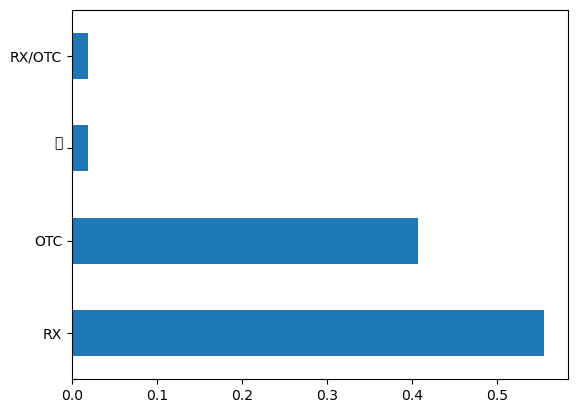

In [15]:
#how many drugs are of type RX or OTC

data.Type.value_counts(normalize=True)
data.Type.value_counts(normalize=True).plot.barh()
pyplt.show()

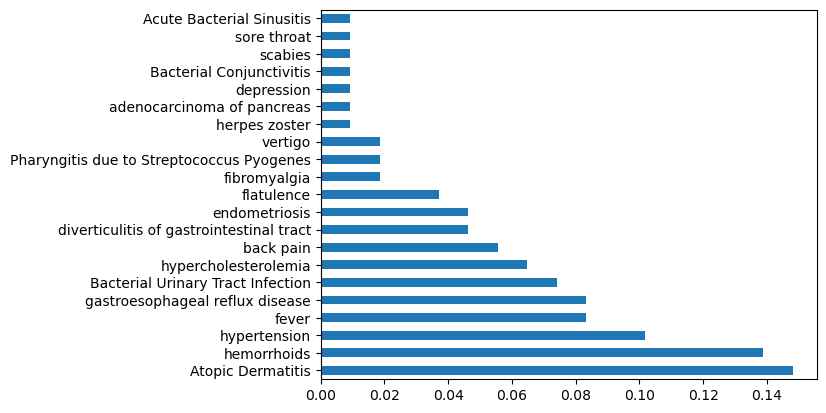

In [16]:
#how is the drug distribution based on the condition being treated
data.Condition.value_counts(normalize=True).plot.barh()
pyplt.show()

In [17]:
#which drug has maximum number of reviews
# df2=df.loc[df['Fee'] == 30000, 'Courses']
drugWithMaxReviews= data.loc[data['NoOfReviews']== data.NoOfReviews.max(),'Drug']
drugWithMaxReviews



654                                             Meropenem
655                                           Tigecycline
1210                                          Milnacipran
1562    Bismuth Subg-Balsam-Znox-Resor, Starch, Pramox...
Name: Drug, dtype: object

<class 'matplotlib.axes._subplots.AxesSubplot'>


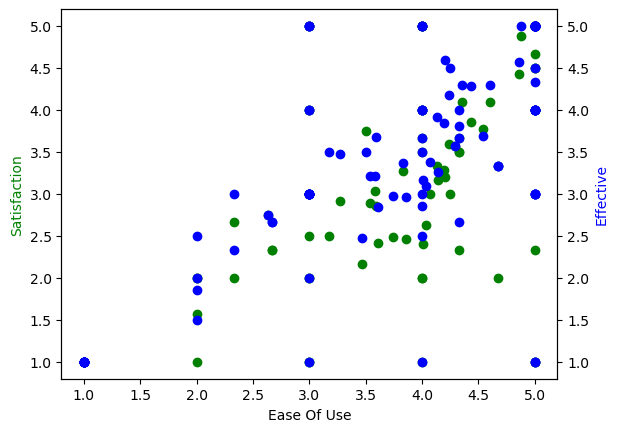

In [18]:

fig, ax1 = pyplt.subplots()
ax2=ax1.twinx()
ax1.scatter('EaseOfUse','Satisfaction',data=data,color='g')
print(type(ax1))
ax1.set_xlabel('Ease Of Use')
ax1.set_ylabel('Satisfaction',color='g')
ax2.set_ylabel('Effective',color='b')
ax2.scatter('EaseOfUse','Effective',data=data,color='b')

pyplt.xticks(rotation = 45, ha = 'right')
pyplt.show()

In [19]:
# import numpy as np
# import matplotlib.pyplot as plt

# x, y = np.random.random((2,50))
# fig, ax1 = plt.subplots()
# ax2 = ax1.twinx()
# ax1.scatter(x, y, c='b')
# ax1.set_xlabel('abc',c='b')
# ax1.set_ylabel('abc',c='b')
# ax1.set_xlabel('pqr',c='b')

# ax2.plot(np.sort(x), np.arange(x.size), c='r')

# The Scatter plot suggests that maximum drugs are easier to use and hence to be more satisfactory